<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/Respuesta_impulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO

In [32]:
%matplotlib inline
import sympy as sym

sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x) #definir ecuacion en simpy con operador diferencial diff
ode

       d              
y(t) + ──(y(t)) = x(t)
       dt             

In [33]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))#resolver edo ante entrada x(t)
#se definin condiciones iniciales 0
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

       ⎛        -t     ⎞  -t
y(t) = ⎝θ(t) - ℯ  ⋅θ(t)⎠⋅ℯ  

In [34]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))#resolver para delta dirac
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h

        -t     
h(t) = ℯ  ⋅θ(t)

In [35]:
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2

 -t    -2⋅t
ℯ   - ℯ    

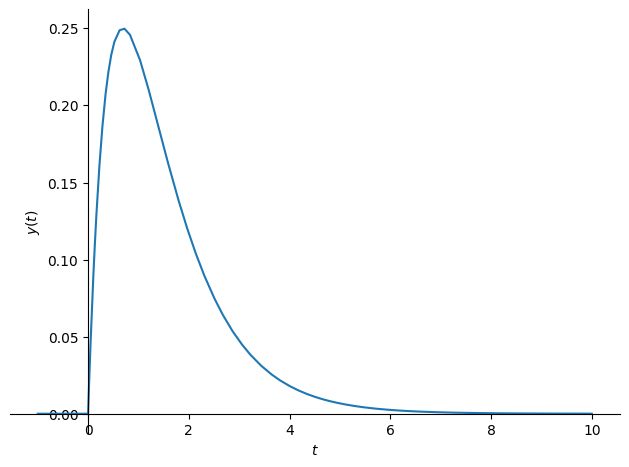

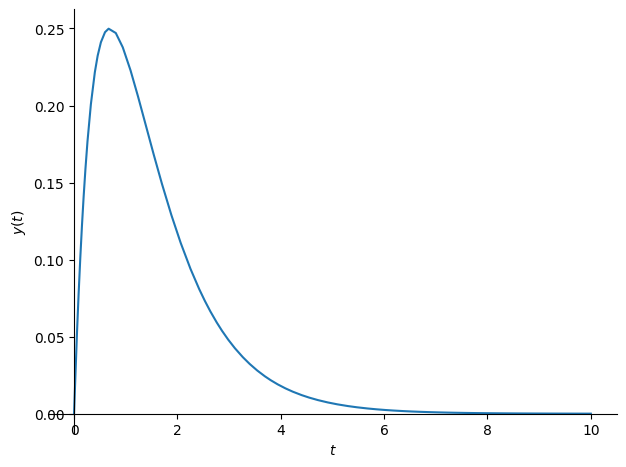

In [36]:
#GRAFICAS

#GRAFICA SOLUCION EDO
p1= sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');
print()
#GRAFICA CONVOLUCION
p2= sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');


Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?

- Respecto a las dos gráficas/ señales obtenidas, si, en ambos casos son iguales, esto se debe a que la EDO describe especificamente la respuesta de un SLIT que es el mismo sistema al cual se le realiza la convolución.  


Compruebe la solución  h(t)  de la EDO cuando  x(t)=δ(t)  de manera manual. Tener en cuenta que  ddtϵ(t)=δ(t) .

Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

*Resuelto manualmente